In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Examine the shape of the DataFrame
df.shape



(5572, 5)

In [4]:
df.dtypes



,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [5]:
# Explore the distribution of spam and non-spam messages
print("\nDistribution of Spam and Non-Spam Messages:\n", df.groupby('v1').size())




Distribution of Spam and Non-Spam Messages:
 v1
ham     4825
spam     747
dtype: int64


In [6]:
# Initial exploration of text data
df['v2'].sample(5)


,v2
474,Nice line said by a broken heart- Plz don't cu...
3919,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...
4492,"LOL .. *grins* .. I'm not babe, but thanks for..."
2125,"Sorry im getting up now, feel really bad- tota..."
430,At home watching tv lor.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)

In [11]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

,0
label,0
text,0


In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

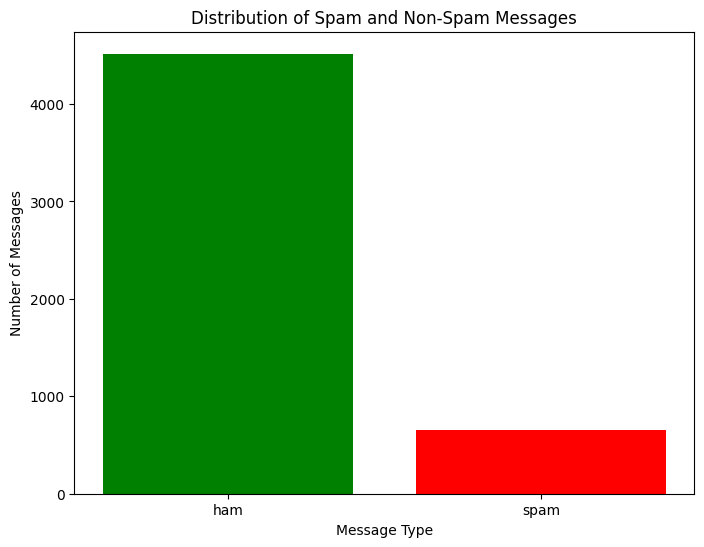

In [16]:
import matplotlib.pyplot as plt

# Visualize the distribution of spam and non-spam messages
spam_ham_counts = df.groupby('label').size()
plt.figure(figsize=(8, 6))
plt.bar(spam_ham_counts.index, spam_ham_counts.values, color=['green', 'red'])
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.show()

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [21]:

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)


In [22]:
df['text'] = df['text'].apply(preprocess_text)


In [23]:
df.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


Feature Engineering

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the preprocessed text data
tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

# Convert the sparse matrix to a dense NumPy array
tfidf_features_dense = tfidf_features.toarray()

# Store the TF-IDF features in a new DataFrame
df_tfidf = pd.DataFrame(tfidf_features_dense)

# Display the first few rows of the TF-IDF DataFrame
display(df_tfidf.head())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data spiltting

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df['label'], test_size=0.2, random_state=42)



In [26]:
X_train.shape


(4135, 5000)

In [27]:
X_test.shape


(1034, 5000)

In [28]:
y_train.shape


(4135,)

In [29]:
y_test.shape

(1034,)

### Model Training

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)


lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evalutaion

In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
y_pred = lr_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       0.96      0.70      0.81       145

    accuracy                           0.95      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9535783365570599


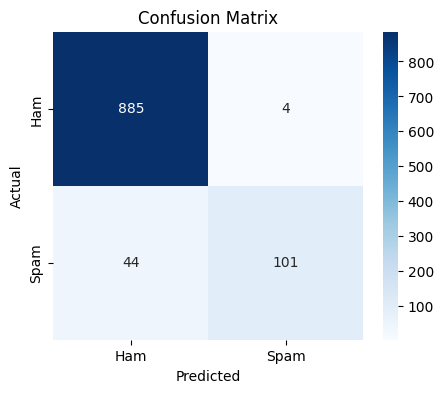

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Testing on new messages

In [36]:
def predict_message(message):
    """
    I predict whether a given message is spam or ham.
    """

    cleaned = preprocess_text(message)
    prediction = lr_model.predict(tfidf_vectorizer.transform([cleaned]))

    return 'Spam' if prediction[0] == 'spam' else 'Ham'

# I test the function with some sample messages.
sample_messages = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now to claim your prize!",
    "Hey, are we still on for dinner tonight?",
    "URGENT! Your mobile number has won $5000. Reply with your bank details."
]

for msg in sample_messages:
    print(f"Message: {msg}")
    print(f"Prediction: {predict_message(msg)}\n")

Message: Congratulations! You've won a free ticket to the Bahamas. Call now to claim your prize!
Prediction: Spam

Message: Hey, are we still on for dinner tonight?
Prediction: Ham

Message: URGENT! Your mobile number has won $5000. Reply with your bank details.
Prediction: Spam

